# 线性回归（二）

**<font color = blue size=4>第一部分:课堂实验</font>**

首次使用，需要下载对应的库 <br/>

使用pip在终端或者命令提示符下载 <br/>
pip install pandas

使用Anaconda下在终端或者命令提示符载<br/>
conda install pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<span style="color:purple">1) 使用pandas库的read_csv()函数(可以参考[pandas的官方文档](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html))将训练数据集'train.csv'和测试数据集'test.csv'载入到Dataframe对象中。</span>

pd.read_csv(filepath_or_buffer,header,parse_dates,index_col) <br/>
其中参数：<br/>
filepath_or_buffer：输入文件的路径，可以是文件路径或者是类文件对象或者是URL<br/>
header：用来指定哪些行作为列的标题<br/>
parse_dates：将数据集中日期数据解析为日期格式<br/>
index_col：用于指定哪一列作为 DataFrame 的索引<br/>

<span style="color:grey"> 处理日期数据，指定日期列并指定日期格式 </span> <br/>
df = pd.read_csv('data.csv', parse_dates=['date'], dayfirst=True)

In [2]:
# Your code here

#读取数据集
#train_frame = pd.read_csv('train.csv')
#test_frame = pd.read_csv('test.csv')

#转化成numpy矩阵
#train = np.array(train_frame)
#test = np.array(test_frame)

train_frame = pd.read_csv('train.csv')
test_frame = pd.read_csv('test.csv')
train = np.array(train_frame)
test = np.array(test_frame)

train_frame

,x,y
0,0.360705,5.555215
1,1.544153,9.890948
2,2.767041,13.911097
3,0.816535,7.835054
4,0.272320,5.924909
...,...,...
155,1.815708,10.233754
156,0.759685,8.002576
157,0.360873,5.799197
158,1.501412,10.246296


<span style="color:purple">2) 
假设模型为一元线性回归模型$\hat{y}=wx+b$, 损失函数为$l(w,b)=\frac{1}{m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$, 其中$\hat{y}^{(i)}$表示第$i$个样本的预测值，$y^{(i)}$表示第$i$个样本的实际标签值, $m$为训练集中样本的个数。求出使得损失函数最小化的参数$w$和$b$。</span>

**线性模型的求解方法有两个。方法①为最小二乘法，方法②为梯度下降法**  

**方法①** 

将$l(w_0,w_1)$分别对$w_0$和$w_1$求导，得到
$$
\frac{\partial l(w_0,w_1)}{\partial w_1}=\frac{1}{m}\left(w_1\sum_{i=1}^m x^{(i)2} -\sum_{i=1}^m (y^{(i)}-w_0)x^{(i)}\right),
$$
$$
\frac{\partial l(w_0,w_1)}{\partial w_0}=\frac{1}{m}\left(mw_0 -\sum_{i=1}^m (y^{(i)}-w_1x^{(i)})\right),
$$
令上述两式为零即可得到$w_0$和$w_1$的解析解：
$$
w_1=\frac{\sum_{i=1}^m y^{(i)} (x^{(i)}-\bar{x})}{\sum_{i=1}^m x^{(i)2}-\frac{1}{m}(\sum_{i=1}^m x^{(i)})^2},
$$
$$
w_0=\frac{1}{m}\sum_{i=1}^m(y^{(i)}-w_1x^{(i)}),
$$
其中$\bar{x}=\frac{1}{m}\sum_{i=1}^m x^{(i)}$为$x$的均值。

**提示**

1、先计算出均值

2、提取出特征x和标签y

3、分别计算权重w和偏置b

In [3]:
#提示： 以下给出会用到的代码示例
#（1）向量各个元素求和可使用np.sum()。示例： a =[[0, 1], [0, 5]]  np.sum(a) = 6
#（2）两个向量坐点乘可使用a.T.dot(b)。示例：给定两个列向量 a = np.array([[1,2],[3,4]])， b = np.array([[11,12],[13,14]]), 使用 a.T.dot(b) 即可求出这两个向量的点乘
#（3）提取矩阵的某一列，可使用a[:,n]，n>=0，即可提取第n列。例如，a[:,0]返回矩阵a的第0列。

# your code here
m=160
x_bar=np.sum(train[:, 0])/m
x=train[:, 0:1]
y=train[:, 1:2]
w=(x-x_bar).T.dot(y)/(np.sum(x*x)-np.sum(train[:, 0])*np.sum(train[:, 0])/m)
b=np.sum(y-w*x)/m
print("w:",w[0][0],"b:",b)


w: 3.0414788700142834 b: 4.906073659228104


**方法②：梯度下降法**   
使用梯度下降法来进行模型的训练。  
算法步骤如下：  
1.初始化模型参数$w_0$和$w_1$的值；  
2.在负梯度的方向上更新参数(批量梯度下降、小批量随机梯度下降或者随机梯度下降均可)，并不断迭代这一步骤，更新公式(以小批量随机梯度下降为例)可以写成：$$w_1\gets w_1-\frac{\alpha}{\left|B\right|}\sum_{i\in{B}}x^{(i)}(w_1x^{(i)}+w_0-y^{(i)}),$$ 和$$w_0\gets w_0-\frac{\alpha}{\left|B\right|}\sum_{i\in{B}}(w_1x^{(i)}+w_0-y^{(i)})，$$ 其中$\alpha$表示学习率,$B$表示每次迭代中随机抽样的小批量，$\left|B\right|$则表示$B$中的样本数量。  
3. 终止条件为迭代次数达到某一上限或者参数更新的幅度小于某个阈值。

In [4]:
# 提示：以下给出会用到的代码示例
# （1）返回向量a的元素个数，可使用 len(a)
# （2）遍历a中的元素进行循环：
# for i in range(len(a))
#   print(a[i])

# Your code here
eta=0.001
epoch=1000
w=1
b=1
x=train[:, 0:1]
y=train[:, 1:2]
for i in range(epoch):
    grad_w=0
    grad_b=0
    for j in range(len(x)):
        grad_w += x[j][0]*(w*x[j][0] + b - y[j][0]) # 计算 w 的梯度
        grad_b += w*x[j][0]+b-y[j][0] # 计算 b 的梯度
    w -= (eta/len(x))*grad_w
    b -= (eta/len(x))*grad_b
print("w:",w,"b:",b)




w: 3.9209479377761514 b: 3.0944350707916666


<span style="color:purple">3) 使用求解出来的线性回归模型对测试数据集'test.csv'进行预测，输出可视化结果（比如用seaborn或者matplotlib等可视化库来画出测试数据的散点图以及训练好的模型函数图像）。</span>

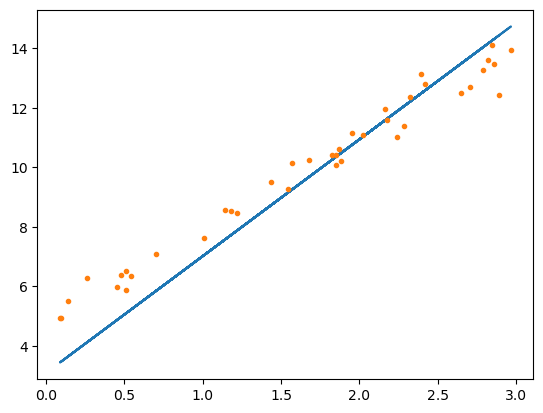

In [5]:
# 一个简单的示例
# A=np.array([[1,2],[2,4],[3,6],[4,8]])
# x = A[:, 0] #从矩阵中提取出第0列作为一个向量
# y = A[:, 1] #从矩阵中提取出第1列作为一个向量
# plt.plot(x, y) #画出折线图
# y1 = np.array([2.1, 3.9, 6.2, 8.1])
# plt.plot(x, y1, '.') #画出散点图
# plt.show()

# Your code here
pred = w * test[:, 0] + b
plt.plot(test[:, 0], pred)
plt.plot(test[:, 0], test[:, 1], '.')
plt.show()

<span style="color:purple">4) 
在训练数据集'train2.csv'上，使用一个三元线性回归模型$\hat{y}=w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3$，求使得损失函数$l(w_0,w_1,w_2,w_3)=\frac{1}{m}\sum_{i=1}^m(\hat{y}^{(i)}-y^{(i)})^2$最小的参数$w_0,w_1,w_2$以及$w_3$。在测试数据集'test2.csv'上进行预测，输出预测结果的均方误差$MSE(\hat{y},y)=\frac{1}{n}\sum^n_{i=1}(y^{(i)}-\hat{y}^{(i)})^2$, $n$为测试集中样本个数。</span>

方法② 类似2)中的方法②。算法步骤如下：  
1.初始化模型参数$w_0,w_1,w_2,w_3$的值；  
2.在负梯度的方向上更新参数(批量梯度下降、小批量随机梯度下降或者随机梯度下降均可)，并不断迭代这一步骤，更新公式(以小批量随机梯度下降为例)可以写成：$$w_j\gets w_j-\frac{\eta}{\left|B\right|}\sum_{i\in{B}}x_j^{(i)}(w_0 + w_1 x_1^{(i)}+w_2 x_2^{(i)}+w_3 x_3^{(i)}-y^{(i)}), j=0,1,2,3,$$ 其中$x_0^{(i)}=1$， 其中$\eta$表示学习率,$B$表示每次迭代中随机抽样的小批量，$\left|B\right|$则表示$B$中的样本数量。  
3. 终止条件为迭代次数达到某一上限或者参数更新的幅度小于某个阈值。

In [6]:
# Your code here
train_frame2 = pd.read_csv('train2.csv')
test_frame2 = pd.read_csv('test2.csv')
train2 = np.array(train_frame2)
test2 = np.array(test_frame2)

eta=0.01
epoch=1000
w=np.array([1.0,1.0,1.0,1.0]) # 初始化权重

x2=train2[:, 0:3]
y2=train2[:, 3:4]
for i in range(epoch):
  
    grad_w=np.array([0.0,0.0,0.0,0.0]) # 初始化梯度
    for j in range(len(x2)):
        temp = (w[0] + w[1]*x2[j][0]+w[2]*x2[j][1]+w[3]*x2[j][2]-y2[j][0])
        grad_w[0] += temp # 计算 w_0 梯度
        grad_w[1] += x2[j][0]*temp# 计算 w_1 梯度
        grad_w[2] += x2[j][1]*temp# 计算 w_2 梯度
        grad_w[3] += x2[j][2]*temp# 计算 w_3 梯度
    for k in range(4):
        w[k] -= (eta/len(x2))*grad_w[k] # 更新梯度
print("w:",w)

x_test=test2[:, 0:3]
y_test=test2[:, 3:4]
x_test=np.insert(x_test,0,1.0,axis=1)
y_pred=np.dot(x_test,w)
Loss=0
for i in range(len(x_test)):
    Loss += (np.power((y_pred[i]-y_test[i][0]),2))/len(x_test)
print("MSE:",Loss)

w: [4.28450749 1.2061334  2.20598515 3.2240369 ]
MSE: 0.4368677148010256


**<font color = blue size=4>第二部分:作业提交</font>**

一、实验课下课前提交代码作为考勤
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、课堂课件获取地址:https://www.jianguoyun.com/p/Ddk4kPQQp5WhChiXwYcGIAA  
实验内容获取地址:https://www.jianguoyun.com/p/DWJxtM4Qp5WhChiFwYgGIAA